<a href="https://colab.research.google.com/github/C-HARRIETH/Autolib/blob/main/Moringa_DS_Core_W4_Independent_Project_2021_03_Chebet_Harrieth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOLIB DATA ANALYSIS**


### **Importing necessary libraries**

In [95]:
# importing pandas library
import pandas as pd

# importing the numpy library
import numpy as np

# importing matplotlib
from matplotlib import pyplot as plt

# importing seaborn
import seaborn as sns
%matplotlib inline

### **Importing and checking the dataset**

In [96]:
# storing url location 
url= 'http://bit.ly/autolib_dataset'

# reading dataset from url
autolib= pd.read_csv(url)

autolib.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [97]:
# size of dataset

autolib.shape

(5000, 25)

In [98]:
# datatypes

autolib.dtypes

Address                object
Cars                    int64
Bluecar counter         int64
Utilib counter          int64
Utilib 1.4 counter      int64
Charge Slots            int64
Charging Status        object
City                   object
Displayed comment      object
ID                     object
Kind                   object
Geo point              object
Postal code             int64
Public name            object
Rental status          object
Scheduled at           object
Slots                   int64
Station type           object
Status                 object
Subscription status    object
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
dtype: object

### **Cleaning dataset**

In [99]:
# Null Values
autolib.isnull().values.any()

True

In [100]:
autolib.isnull().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [101]:
# Dropping columns having more than 95% null values

autolib.drop(['Displayed comment', 'Scheduled at'], axis= 1, inplace=True)

In [102]:
# Duplicate values

autolib.duplicated().values.any()

False

In [103]:
# Converting dates and times into one column

autolib['Datetime']= pd.to_datetime(autolib[['year', 'month','day', 'hour', 'minute']])

# Sorting the dataframe by the datetime column.
autolib.sort_values(by=['Datetime'], axis= 0, inplace= True)

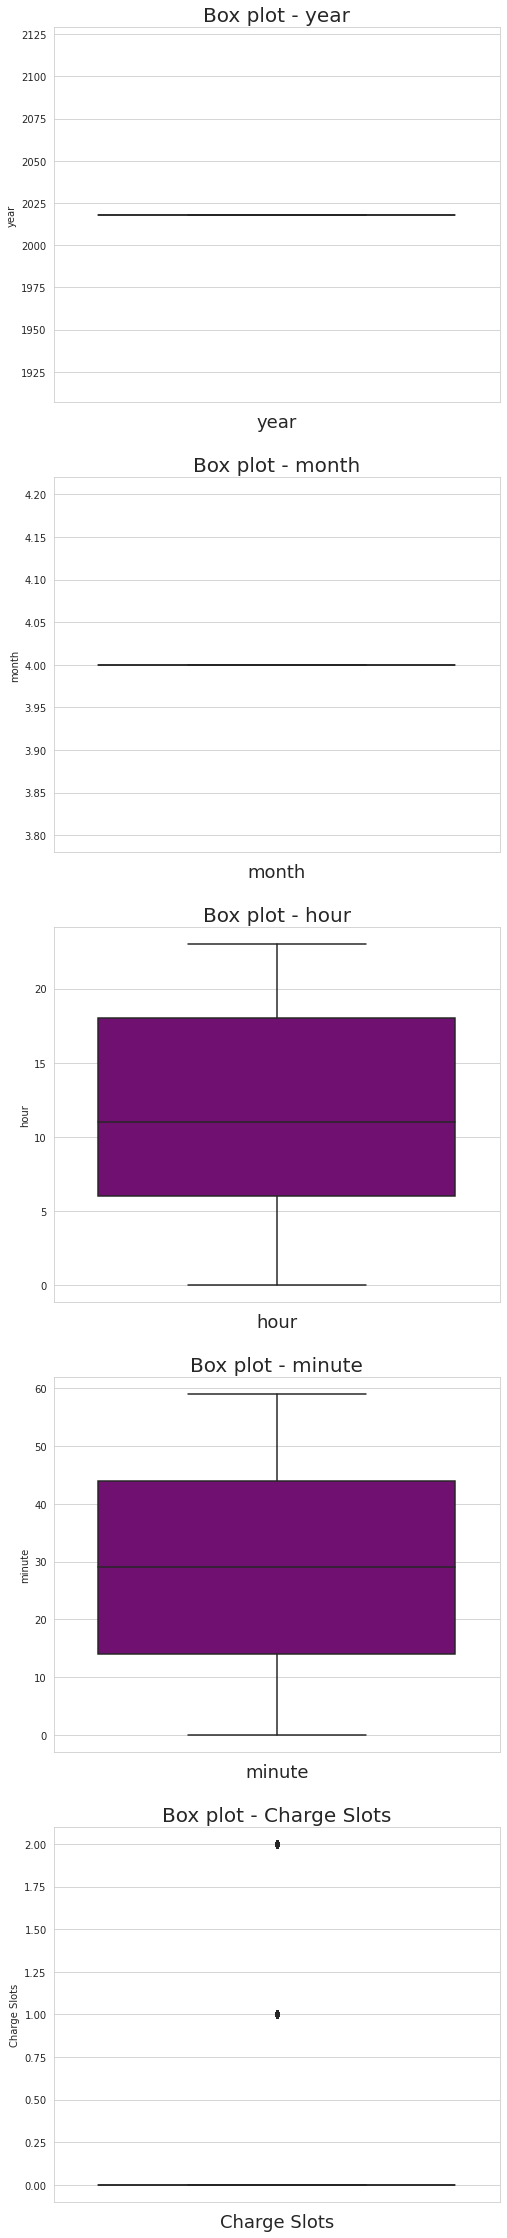

In [104]:
# Outlier detection using box plots

col_names = ['year','month', 'hour', 'minute', 'Charge Slots']

fig, ax = plt.subplots(len(col_names), figsize=(8, 40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=autolib[col_val], ax=ax[i], color='purple')
    ax[i].set_title('Box plot - '+col_val, fontsize=20)
    ax[i].set_xlabel(col_val, fontsize=18)
    
plt.show()

The data does not seem to be having outliers. Charge slots has two unique values explaining the shape of the boxplot. The data is from one year, 2018 and the fourth month of the year, April. It also covers 9 days. Nothing is outside those limits, hence no outliers, just a few extreme values.

### **Univariate and Bivariate Analysis**

In [105]:
autolib.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [106]:
autolib['Bluecar counter'].mode()

0    0
dtype: int64

In [107]:
autolib['Utilib counter'].mode()

0    0
dtype: int64

In [108]:
autolib['Utilib 1.4 counter'].mode()

0    0
dtype: int64


The most appearing number of electric cars in Paris at a particular station is 0. This could mean that electric cars are oftenly used hence their absence at the stations.

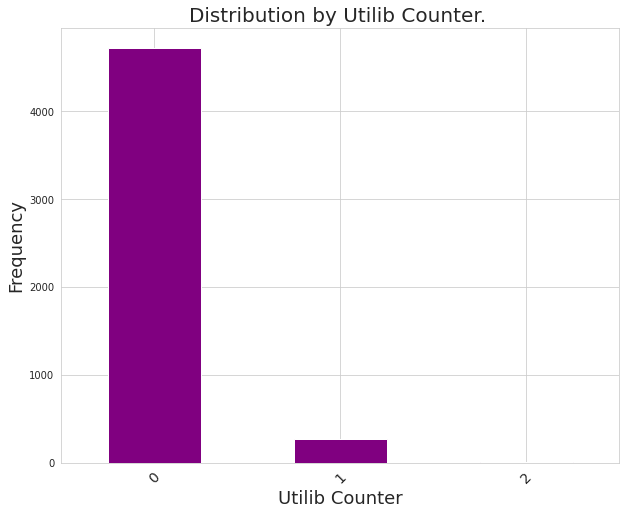

In [109]:
# Distribution of bluecars

def bar(counter, xlabel): 

  sns.set_style('whitegrid')
  ax= plt.subplots(figsize= (10, 8))
  ax= counter.value_counts().plot.bar(color= 'purple')
  ax.set_ylabel('Frequency', fontdict={'size': 18})
  ax.set_xlabel(f"{xlabel}", fontsize= 18)
  plt.xticks(rotation= 45, fontsize= 14)
  ax.set_title(f"Distribution by {xlabel}. " , fontsize= 20)
  plt.show()

bar(autolib['Utilib counter'], "Utilib Counter")

There are very few Utilib Counters. Almost accounting for at most 5% 

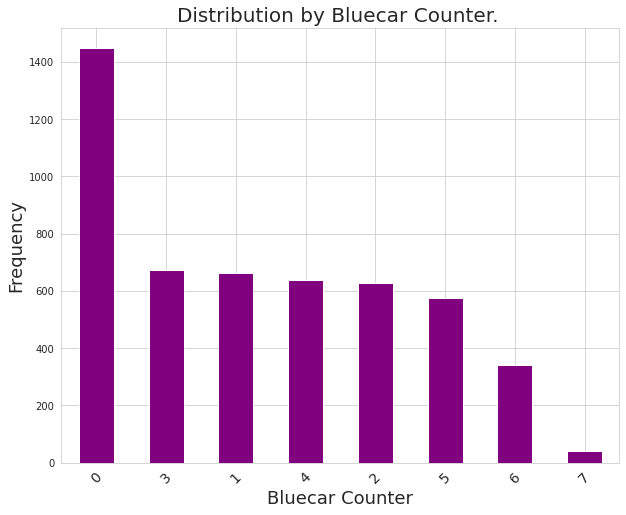

In [110]:
bar(autolib['Bluecar counter'], "Bluecar Counter")

Bluecars have a fair distribution between 1 and 6. Having more than 6 bluecars is very rare. 

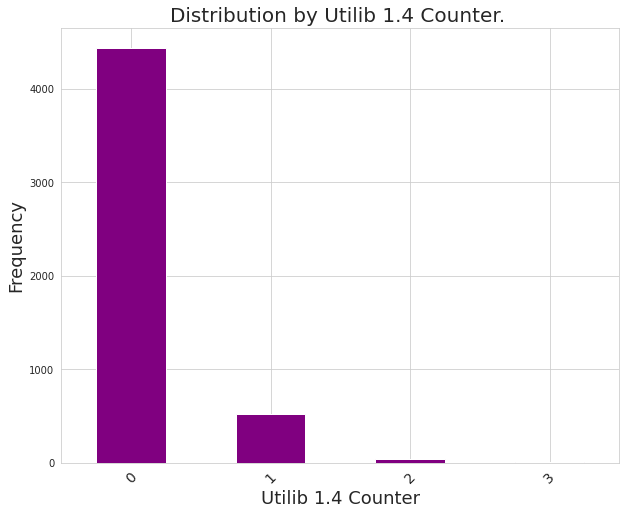

In [111]:
bar(autolib['Utilib 1.4 counter'], "Utilib 1.4 Counter")

Utilib 1.4 are also very few. 

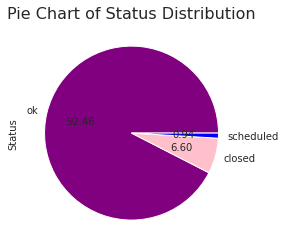

In [112]:
# Distribution between status 

autolib['Status'].value_counts().plot(kind='pie', autopct='%.2f', colors= ['purple', 'pink', 'blue']  )

plt.title('Pie Chart of Status Distribution', fontsize=16)

plt.show()

Shows that a station does not have to have cars in order to have resources.

In [113]:
ulib4= autolib['Utilib 1.4 counter'] == 0
utilib= autolib['Utilib counter'] == 0
bluecar= autolib['Bluecar counter'] == 0
car= autolib['Cars'] == 0

autolib[ulib4 & utilib & bluecar & car]

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Datetime
1046,112 Rue Monge BÃ¢timent Lieu-dit,0,0,0,0,0,nonexistent,Paris,paris-monge-112,STATION,"48.8392739, 2.3507414",75005,Paris/Monge/112,operational,4,station,ok,nonexistent,2018,4,1,0,0,2018-04-01 00:00:00
1107,19 place de la Madeleine,0,0,0,0,0,nonexistent,Paris,paris-madeleinetronchet-parking,PARKING,"48.87086, 2.32441",75008,Paris/Madeleine Tronchet/Parking,operational,6,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00
2874,44 rue SÃ©bastien Mercier,0,0,0,0,0,nonexistent,Paris,paris-sebastienmercier-44,STATION,"48.8439105, 2.2796928",75015,Paris/SÃ©bastien Mercier/44,operational,4,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00
4453,2 rue Neuve Saint-Pierre,0,0,0,0,1,operational,Paris,paris-neuvesaintpierre-2,STATION,"48.853574, 2.363958",75004,Paris/Neuve Saint-Pierre/2,operational,4,station,ok,nonexistent,2018,4,1,0,4,2018-04-01 00:04:00
2497,53 rue Henri PoincarÃ©,0,0,0,0,0,nonexistent,AsniÃ¨res-sur-Seine,asnieressurseine-henripoincare-53,STATION,"48.93068, 2.281273",92600,AsniÃ¨res-sur-Seine/Henri PoincarÃ©/53,broken,0,station,closed,nonexistent,2018,4,1,0,32,2018-04-01 00:32:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,3 rue de Vaugirard,0,0,0,0,1,operational,Paris,paris-vaugirard-3,STATION,"48.84893, 2.340624",75006,Paris/Vaugirard/3,operational,5,station,ok,nonexistent,2018,4,9,23,32,2018-04-09 23:32:00
3414,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,0,station,closed,nonexistent,2018,4,9,23,41,2018-04-09 23:41:00
2164,11 rue de vincennes,0,0,0,0,0,nonexistent,Montreuil,montreuil-vincennes-11,STATION,"48.8567808, 2.4378954",93100,Montreuil/Vincennes/11,operational,7,station,ok,nonexistent,2018,4,9,23,41,2018-04-09 23:41:00
3201,21 bis rue Notre-Dame des Victoires,0,0,0,0,0,nonexistent,Paris,paris-notredamedesvictoires-21,STATION,"48.8696994, 2.3423247",75002,Paris/Notre-Dame des Victoires/21,operational,4,station,ok,nonexistent,2018,4,9,23,58,2018-04-09 23:58:00


There are many observations where cars could not be at a station at a particular time. 

In [114]:
# Coming up with a new column for differences in bluecars

def diff(data, var1):
  autolib[var1] = data.sub(data.shift())
  autolib[var1].iloc[0] = data.iloc[0]


diff(autolib['Bluecar counter'], 'Bluediff')
diff(autolib['Utilib counter'], 'Utilibdiff')
diff(autolib['Utilib 1.4 counter'], 'Ulib4diff')



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [115]:
autolib['Ulib4diff'].corr(autolib['Utilibdiff'])

0.07077865398863258

In [116]:
autolib['Bluediff'].corr(autolib['Utilibdiff'])

0.053996874319853456

In [117]:
autolib['Bluediff'].corr(autolib['Ulib4diff'])

0.06751019725313402

There is no correlation in the differences columns

In [118]:
autolib.set_index('Datetime', inplace=True)

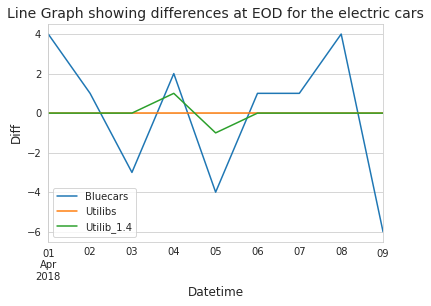

<Figure size 432x288 with 0 Axes>

In [119]:
# Plot showing number of cars at the station at the end of the day

diff = autolib['Bluediff'].resample('D').sum()
ulib= autolib['Utilibdiff'].resample('D').sum()
ulib4= autolib['Ulib4diff'].resample('D').sum()

# plt.title(f'Electric Cars at stations by days{}')
# plt.ylabel(f'{} Counter')

diff.plot()
ulib.plot()
ulib4.plot()

plt.legend(['Bluecars', 'Utilibs', 'Utilib_1.4'])
plt.ylabel('Diff', fontsize=12)
plt.xlabel('Datetime', fontsize=12)
plt.title('Line Graph showing differences at EOD for the electric cars', fontsize= 14)
plt.show()

plt.savefig('Diff.jpg')

In [120]:
# Converting dates and times into one column

autolib['dates']= pd.to_datetime(autolib[['year', 'month','day', 'hour', 'minute']])

In [121]:
autolib['DayOfWeek'] = autolib['dates'].dt.day_name()

In [122]:
day= autolib['day'] == 5
autolib[day ].head(2)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Bluediff,Utilibdiff,Ulib4diff,dates,DayOfWeek
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-05 00:02:00,54 rue HÃ©ricart,3,3,0,0,0,nonexistent,Paris,paris-hericart-54,STATION,"48.8490157, 2.2874011",75015,Paris/HÃ©ricart/54,operational,1,station,ok,nonexistent,2018,4,5,0,2,-1.0,0.0,-1.0,2018-04-05 00:02:00,Thursday
2018-04-05 00:06:00,40 Avenue Victor Hugo,3,3,0,0,0,nonexistent,Clamart,clamart-victorhugo-40,STATION,"48.804098, 2.2673976",92140,Clamart/Victor Hugo/40,operational,2,station,ok,nonexistent,2018,4,5,0,6,0.0,0.0,0.0,2018-04-05 00:06:00,Thursday


In [123]:
ah= (autolib['day']== 3)
autolib[ah].head(2)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Bluediff,Utilibdiff,Ulib4diff,dates,DayOfWeek
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-03 00:02:00,6 Boulevard Haussmann,1,1,0,0,0,operational,Paris,paris-haussmann-6,STATION,"48.8723178, 2.3387762",75009,Paris/Haussmann/6,operational,3,station,ok,nonexistent,2018,4,3,0,2,-4.0,0.0,0.0,2018-04-03 00:02:00,Tuesday
2018-04-03 00:05:00,1 Rue Dante,0,0,0,0,0,nonexistent,Paris,paris-dante-1,STATION,"48.8513879, 2.3472476",75005,Paris/Dante/1,operational,4,station,ok,nonexistent,2018,4,3,0,5,-1.0,0.0,0.0,2018-04-03 00:05:00,Tuesday


In [124]:
eh= autolib['day'] == 4
autolib[eh].head(2)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Bluediff,Utilibdiff,Ulib4diff,dates,DayOfWeek
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-04 00:01:00,78 Avenue du Maine,0,0,0,0,2,operational,Paris,paris-maine-78,SPACE,"48.8388247, 2.3221905",75014,Paris/Maine/78,operational,6,full_station,ok,operational,2018,4,4,0,1,-2.0,0.0,0.0,2018-04-04 00:01:00,Wednesday
2018-04-04 00:01:00,64 Rue de Fitzelin,2,2,0,1,0,nonexistent,Ãpinay-sur-Seine,epinaysurseine-fitzelin-64,STATION,"48.960565, 2.3068329",93800,Ãpinay-sur-Seine/Fitzelin/64,operational,2,station,ok,nonexistent,2018,4,4,0,1,2.0,0.0,1.0,2018-04-04 00:01:00,Wednesday


Thursday is when most cars are at the station, translating to more people travelling at a particular time on Thursdays. Tuesday has this trend for the bluecars. 

### **Hypothesis Testing**

Null Hypothesis: The number of bluecars in Nanterre are not less than those coming from Issy-les-Moulineaux 

Alternative hypothesis: The number of bluecars in Nanterre are less than those coming from Issy-les-Moulineaux

In [125]:
# Sampling weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] 
    
# selecting rows based on condition 
autolibweekday = autolib[autolib['DayOfWeek'].isin(weekdays)] 
    
autolibweekday.shape

(3408, 28)

In [126]:
# Creating different samples from the population

nan_autolib = autolibweekday[autolibweekday.City =='Nanterre']
issy_autolib = autolibweekday[autolibweekday.City =='Issy-les-Moulineaux']

In [127]:
#check the shape of both the samples

print(nan_autolib.shape,issy_autolib.shape)

(79, 28) (71, 28)


In [128]:
# making equal records in the samples
nan_autolib = nan_autolib.sample(71)
print(nan_autolib.shape,issy_autolib.shape)

(71, 28) (71, 28)


In [129]:
from scipy import stats

In [130]:
# Checking variances

alpha = 0.05
Stats, Pvalue = stats.levene(nan_autolib['Bluecar counter'], nan_autolib['Bluecar counter'])
print(f' Test statistics : {Stats} \n Alpha : {alpha} \n P-value : {Pvalue}')
if Pvalue > alpha:
  print(' Variances are same accept null hypothesis ')
else:
  print(' Variances are not same reject not null hypothesis ')

 Test statistics : 0.0 
 Alpha : 0.05 
 P-value : 1.0
 Variances are same accept null hypothesis 


In [131]:
from sklearn.preprocessing import scale

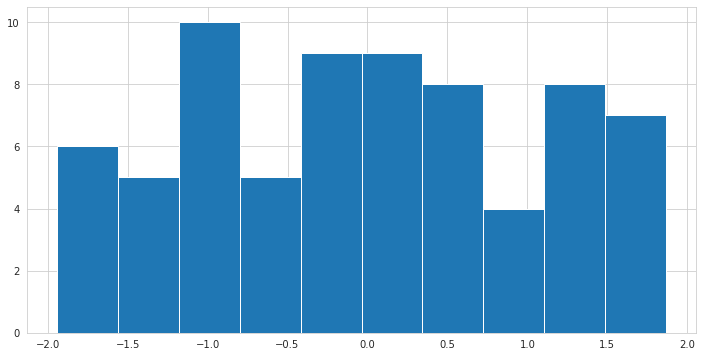

In [132]:
# normality test by use of a histogram

diff = scale((np.array(nan_autolib['Bluecar counter']) - np.array(issy_autolib['Bluecar counter'])))
plt.figure(figsize=(12,6))
plt.hist(diff)
plt.show()

In [133]:
# Shapiro Wilk's Test of normality 

alpha = 0.05
statistic,p_value = stats.shapiro(diff)
if p_value > alpha:
  print(f'Accept Null Hypothesis p-value : {p_value}')
else:
  print(f'Reject Null Hypothesis p-value : {p_value}')

Reject Null Hypothesis p-value : 0.039798323065042496


In [134]:
# Two Sample Independent T-Test

stats.ttest_ind(nan_autolib['Bluecar counter'], issy_autolib['Bluecar counter'])

Ttest_indResult(statistic=1.8022013584813215, pvalue=0.0736651769193336)

The p-value is 6% which is more than 5% hence we reject the null hypothesis.

The t-statistic is positive which shows that Bluecars coming from Nanterre are more than those coming from Issy-les-Moulineaux

In [141]:
import scipy.stats

In [142]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean_confidence_interval(diff)

(1.0945860806163514e-17, -0.2383808294979589, 0.2383808294979589)

In [ ]:
# Confidence interval plot
x= nan_autolib['Bluecar counter']
y = issy_autolib['Bluecar counter']
#some confidence interval
ci = 1.96 * np.std(y)/np.mean(y)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [136]:
from numpy import std, mean, sqrt

In [138]:
# Cohen's test of effect size 
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

cohen_d(nan_autolib['Bluecar counter'], issy_autolib['Bluecar counter'])

0.3024747567868987

The effect size is considerably small

In [145]:
# Test Sensitivity
from scipy.stats import t
# define probability
p = 0.95
# retrieve value <= probability
value = t.ppf(p, diff)
print(value)
# confirm with cdf
p = t.cdf(value, diff)
print(p)

[4.93696266e+00 4.13631675e+06 9.05802135e+00            nan
            nan            nan            nan 4.93696266e+00
            nan            nan            nan 4.75690572e+01
            nan 4.75690572e+01            nan 4.13631675e+06
 4.75690572e+01            nan 4.93696266e+00 4.75690572e+01
 4.75690572e+01 4.93696266e+00            nan            nan
            nan 9.05802135e+00 4.13631675e+06            nan
 4.13631675e+06            nan            nan            nan
 4.13631675e+06 4.75690572e+01            nan 3.65573029e+00
            nan 3.06736353e+00 4.93696266e+00 4.93696266e+00
 4.93696266e+00 3.06736353e+00 9.05802135e+00            nan
            nan 4.13631675e+06 4.13631675e+06            nan
            nan 4.75690572e+01 3.06736353e+00            nan
            nan            nan            nan            nan
            nan            nan 4.75690572e+01 4.13631675e+06
 9.05802135e+00 3.65573029e+00 3.65573029e+00 4.13631675e+06
            nan         